<b>this book is not my own production, it is just a rewriting of NLTK book using jupyter notebook:</b>


 http://www.nltk.org/book/ch02.html#sec-further-reading-corpora

# Accessing Text Corpora and Lexical Resources

Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora. The goal of this chapter is to answer the following questions:

What are some useful text corpora and lexical resources, and how can we access them with Python?

Which Python constructs are most helpful for this work?

How do we avoid repeating ourselves when writing Python code?

This chapter continues to present programming concepts by example, in the context of a linguistic processing task. We will wait until later before exploring each Python construct systematically. Don't worry if you see an example that contains something unfamiliar; simply try it out and see what it does, and — if you're game — modify it by substituting some part of the code with a different text or word. This way you will associate a task with a programming idiom, and learn the hows and whys later.

## 1   Accessing Text Corpora



As just mentioned, a text corpus is a large body of text. Many corpora are designed to contain a careful balance of material in one or more genres. We examined some small text collections in 1., such as the speeches known as the US Presidential Inaugural Addresses. This particular corpus actually contains dozens of individual texts — one per address — but for convenience we glued them end-to-end and treated them as a single text. 1. also used various pre-defined texts that we accessed by typing from nltk.book import *. However, since we want to be able to work with other texts, this section examines a variety of text corpora. We'll see how to select individual texts, and how to work with them.



### 1.1   Gutenberg Corpus



NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/. We begin by getting the Python interpreter to load the NLTK package, then ask to see nltk.corpus.gutenberg.fileids(), the file identifiers in this corpus:



In [1]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 864kB/s 
  Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [2]:
! pip install nltk
import nltk
nltk.download()

    100% |████████████████████████████████| 1.2MB 939kB/s 
  Running setup.py bdist_wheel for nltk ... - \ | / - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/79/8b/2a/b2da7fce57a1fd9b20b08fa8800c83b6fde62af9e880722e29
Successfully built nltk
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /home/jovyan/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /home/jovyan/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to
       |     /home/jovyan/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /home/jovyan/nltk_data...
  

True

In [3]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let's pick out the first of these texts — Emma by Jane Austen — and give it a short name, emma, then find out how many words it contains:



In [4]:
emma=nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

Note:

In 1, we showed how you could carry out concordancing of a text such as text1 with the command text1.concordance(). However, this assumes that you are using one of the nine texts obtained as a result of doing from
nltk.book import *. Now that you have started examining data from nltk.corpus, as in the previous example, you have to employ the following pair of statements to perform concordancing and other tasks from 1:



In [5]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt')) # we should first convert austen-emma.txt to a Text
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

When we defined emma, we invoked the words() function of the gutenberg object in NLTK's corpus package. But since it is cumbersome to type such long names all the time, Python provides another version of the import statement, as follows:



In [6]:
from nltk.corpus import gutenberg
gutenberg.fileids()
emma=gutenberg.words("austen-emma.txt")
len(gutenberg.raw("austen-emma.txt")),len(emma)
#gutenberg.raw("austen-emma.txt")

(887071, 192427)

Let's write a short program to display other information about each text, by looping over all the values of fileid corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. For a compact output display, we will round each number to the nearest integer, using round().



In [7]:
 for fileid in gutenberg.fileids():
...     num_chars = len(gutenberg.raw(fileid))  # total number of caracters including spaces (\n)
...     num_words = len(gutenberg.words(fileid)) # total number of words
...     num_sents = len(gutenberg.sents(fileid))  # total number of sentences
...     num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))   # 
...     print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


This program displays three statistics for each text: average word length, average sentence length, and the number of times each vocabulary item appears in the text on average (our lexical diversity score). Observe that average word length appears to be a general property of English, since it has a recurrent value of 4. (In fact, the average word length is really 3 not 4, since the num_chars variable counts space characters.) By contrast average sentence length and lexical diversity appear to be characteristics of particular authors.



The previous example also showed how we can access the "raw" text of the book [1], not split up into tokens. The raw() function gives us the contents of the file without any linguistic processing. So, for example, len(gutenberg.raw('blake-poems.txt')) tells us how many letters occur in the text, including the spaces between words. The sents() function divides the text up into its sentences, where each sentence is a list of words:

In [8]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt') # all sentences in shakespeare-macbeth text
macbeth_sentences
macbeth_sentences[1116]
longest_len = max(len(s) for s in macbeth_sentences)   # len of the longest sentences
[s for s in macbeth_sentences if len(s) == longest_len]  # all sentences with the longest_len

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

Note

Most NLTK corpus readers include a variety of access methods apart from words(), raw(), and sents(). Richer linguistic content is available from some corpora, such as part-of-speech tags, dialogue tags, syntactic trees, and so forth; we will see these in later chapters.

### 1.2   Web and Chat Text



Although Project Gutenberg contains thousands of books, it represents established literature. It is important to consider less formal language as well. NLTK's small collection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews:



In [9]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


There is also a corpus of instant messaging chat sessions, originally collected by the Naval Postgraduate School for research on automatic detection of Internet predators. The corpus contains over 10,000 posts, anonymized by replacing usernames with generic names of the form "UserNNN", and manually edited to remove any other identifying information. The corpus is organized into 15 files, where each file contains several hundred posts collected on a given date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adults chatroom). The filename contains the date, chatroom, and number of posts; e.g., 10-19-20s_706posts.xml contains 706 posts gathered from the 20s chat room on 10/19/2006.



In [10]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

### 1.3   Brown Corpus



In [11]:
# these cells for a some search about arabic, you can skip them ;)
from nltk.corpus import stopwords
stopwords.fileids()

['danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'kazakh',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [12]:
nltk.word_tokenize('في_بيتنا كل شي لما تحتاجه يضيع ...ادور على شاحن فجأة يختفي ..لدرجة اني اسوي نفسي ادور شيء ')


['في_بيتنا',
 'كل',
 'شي',
 'لما',
 'تحتاجه',
 'يضيع',
 '...',
 'ادور',
 'على',
 'شاحن',
 'فجأة',
 'يختفي',
 '..لدرجة',
 'اني',
 'اسوي',
 'نفسي',
 'ادور',
 'شيء']

In [13]:
arabic=nltk.word_tokenize('أنا بغيت نلعب مع صحابي كرة')
print(len(arabic))
print(arabic)

6
['أنا', 'بغيت', 'نلعب', 'مع', 'صحابي', 'كرة']


In [14]:
nltk.pos_tag(arabic)

[('أنا', 'JJ'),
 ('بغيت', 'NNP'),
 ('نلعب', 'NNP'),
 ('مع', 'NNP'),
 ('صحابي', 'NNP'),
 ('كرة', 'NN')]

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).



![](brown.JPG)

We can access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). We can optionally specify particular categories or files to read:



In [15]:
from nltk.corpus import brown
brown.categories()
brown.words(categories='news')
brown.words(fileids=['cg22'])
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre. Remember to import nltk before doing the following:



In [16]:
from nltk.corpus import brown
news_text=brown.words(categories='news')
fdist=nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(  m+ ':',fdist[m],end=' ')



can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

Note

We need to include end=' ' in order for the print function to put its output on a single line.

Note

Your Turn: Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

In [17]:
from nltk.corpus import brown
religion_text=brown.words(categories='religion')
fdist2=nltk.FreqDist(w.lower() for w in religion_text)
wh=['what','who','whom','when','what','where']
for w in wh:
    print(w+':',fdist2[w],end=' ')

what: 86 who: 102 whom: 11 when: 68 what: 86 where: 21 

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions. These are presented systematically in 2, where we also unpick the following code line by line. For the moment, you can ignore the details and just concentrate on the output.



In [18]:
cfd = nltk.ConditionalFreqDist(
...           (genre, word)      # given 'genre', we count occurence of 'word'==> conditional Freq dist
...           for genre in brown.categories()
...           for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)  # give result just for the given genres ( condition) and the given samples ( events)


                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Observe that the most frequent modal in the news genre is will, while the most frequent modal in the romance genre is could. Would you have predicted this? The idea that word counts might distinguish genres will be taken up again in chap-data-intensive.



### 1.4   Reuters Corpus



The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid 'test/14826' is a document drawn from the test set. This split is for training and testing algorithms that automatically detect the topic of a document, as we will see in chap-data-intensive.



In [19]:
from nltk.corpus import reuters
reuters.fileids()
reuters.categories()


['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Unlike the Brown Corpus, categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.



In [20]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [21]:
reuters.categories(['training/9865', 'training/9880'])


['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [22]:
reuters.fileids('barley')
reuters.fileids(['barley', 'corn'])


['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

Similarly, we can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.



In [23]:
reuters.words('training/9865')[:14]
reuters.words(['training/9865', 'training/9880'])
reuters.words(categories='barley')
reuters.words(categories=['barley', 'corn'])


['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

In 1, we looked at the Inaugural Address Corpus, but treated it as a single text. The graph in fig-inaugural used "word offset" as one of the axes; this is the numerical index of the word in the corpus, counting from the first word of the first address. However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:



In [24]:
from nltk.corpus import inaugural


In [25]:
from nltk.corpus import inaugural
inaugural.fileids()
[fileid[:4] for fileid in inaugural.fileids()]


['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

Let's look at how the words America and citizen are used over time. The following code converts the words in the Inaugural corpus to lowercase using w.lower() [1], then checks if they start with either of the "targets" america or citizen using startswith() [1]. Thus it will count words like American's and Citizens. We'll learn about conditional frequency distributions in 2; for now just consider the output, shown in 1.1.



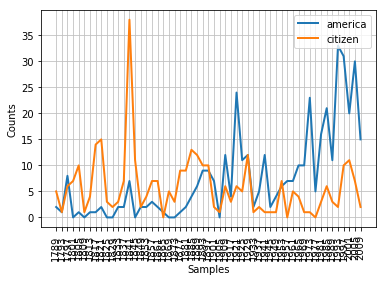

In [26]:
cfd = nltk.ConditionalFreqDist(
...           (target, fileid[:4]) #  counts target for each fileid[:4] for ..
...           for fileid in inaugural.fileids()
...           for w in inaugural.words(fileid)
...           for target in ['america', 'citizen']
...           if w.lower().startswith(target)) 
cfd.plot()

### 1.6   Annotated Text Corpora

Many text corpora contain linguistic annotations, representing POS tags, named entities, syntactic structures, semantic roles, and so forth. NLTK provides convenient ways to access several of these corpora, and has data packages containing corpora and corpus samples, freely downloadable for use in teaching and research. 1.2 lists some of the corpora. For information about downloading them, see  http://nltk.org/data. For more examples of how to access NLTK corpora, please consult the Corpus HOWTO at http://nltk.org/howto.



### 1.7   Corpora in Other Languages



NLTK comes with corpora for many languages, though in some cases you will need to learn how to manipulate character encodings in Python before using these corpora (see 3.3).



In [27]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [28]:
nltk.corpus.udhr.fileids()


['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

The last of these corpora, udhr, contains the Universal Declaration of Human Rights in over 300 languages. The fileids for this corpus include information about the character encoding used in the file, such as  UTF8 or Latin1. Let's use a conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the udhr corpus. The output is shown in 1.2 (run the program yourself to see a color plot). Note that True and False are Python's built-in boolean values.



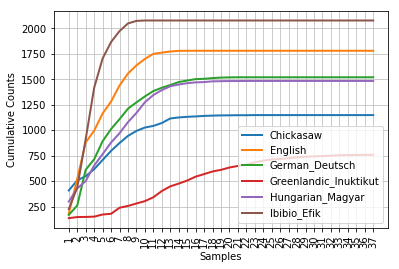

In [29]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd=nltk.ConditionalFreqDist( 
                              (lang,len(word))
                              for lang in languages
                              for word in udhr.words(lang+'-Latin1') )

cfd.plot(cumulative=True)



<i>Cumulative Word Length Distributions: Six translations of the Universal Declaration of Human Rights are processed; this graph shows that words having 5 or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text</i>

Note

Your Turn: Pick a language of interest in udhr.fileids(), and define a variable raw_text = udhr.raw(Language-Latin1). Now plot a frequency distribution of the letters of the text using nltk.FreqDist(raw_text).plot().

In [30]:
udhr.fileids()[1:4]

['Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1']

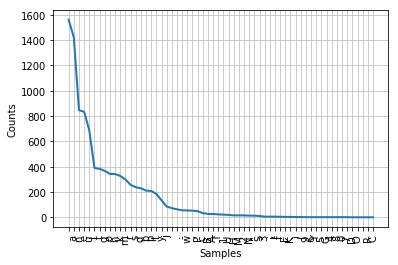

In [31]:
raw_text=udhr.raw('Achehnese-Latin1')  # Recall .raw()  gives how many letters including spaces
nltk.FreqDist(raw_text).plot()

Unfortunately, for many languages, substantial(large in amount or value corpora are not yet available. Often there is insufficient government or industrial support for developing language resources, and individual efforts are piecemeal and hard to discover or re-use. Some languages have no established writing system, or are endangered. (See 7 for suggestions on how to locate language resources.)


### 1.8   Text Corpus Structure



We have seen a variety of corpus structures so far; these are summarized in 1.3. The simplest kind lacks any structure: it is just a collection of texts. Often, texts are grouped into categories that might correspond to genre, source, author, language, etc. Sometimes these categories overlap, notably in the case of topical categories as a text can be relevant to more than one topic. Occasionally, text collections have temporal structure, news collections being the most common example.



![](corpus.JPG)

![](nltk.JPG)

In [32]:
# examples:
nltk.corpus.brown.readme()

'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'

In [33]:
nltk.corpus.brown.encoding('religion')

'ascii'

NLTK's corpus readers support efficient access to a variety of corpora, and can be used to work with new corpora. 1.3 lists functionality provided by the corpus readers. We illustrate the difference between some of the corpus access methods below:



In [34]:
raw=gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [35]:
words=gutenberg.words("burgess-busterbrown.txt")
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [36]:
sents=gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

### 1.9   Loading your own Corpus



If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's PlaintextCorpusReader. Check the location of your files on your file system; in the following example, we have taken this to be the directory /usr/share/dict. Whatever the location, set this to be the value of corpus_root [1]. The second parameter of the  PlaintextCorpusReader initializer [2] can be a list of fileids, like ['a.txt', 'test/b.txt'], or a pattern that matches all fileids, like '[abc]/.*\.txt' (see 3.4 for information about regular expressions).



## 2   Conditional Frequency Distributions



We introduced frequency distributions in 3. We saw that given some list mylist of words or other items, FreqDist(mylist) would compute the number of occurrences of each item in the list. Here we will generalize this idea.

When the texts of a corpus are divided into several categories, by genre, topic, author, etc, we can maintain separate frequency distributions for each category. This will allow us to study systematic differences between the categories. In the previous section we achieved this using NLTK's ConditionalFreqDist data type. A conditional frequency distribution is a collection of frequency distributions, each one for a different "condition". The condition will often be the category of the text. 2.1 depicts a fragment of a conditional frequency distribution having just two conditions, one for news text and one for romance text.

![](cond.JPG)

A frequency distribution counts observable events, such as the appearance of words in a text. A conditional frequency distribution needs to pair each event with a condition. So instead of processing a sequence of words [1], we have to process a sequence of pairs [2]:



In [37]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...] #[1]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...] #[2]

Each pair has the form (condition, event). If we were processing the entire Brown Corpus by genre there would be 15 conditions (one per genre), and 1,161,192 events (one per word).



### 2.2   Counting Words by Genre



In [38]:
from nltk.corpus import brown
cfd=nltk.ConditionalFreqDist(
                             (genre,  word)
                             for genre in brown.categories()
                             for word in brown.words(categories=genre))


Let's break this down, and look at just two genres, news and romance. For each genre [2], we loop over every word in the genre [3], producing pairs consisting of the genre and the word [1]:



In [39]:
genre_words=[(genre, word) for genre in ['news', 'romance'] for word in brown.words(categories=genre)]
len(genre_words)

170576

So, as we can see below, pairs at the beginning of the list genre_word will be of the form ('news', word) [1], while those at the end will be of the form ('romance', word) [2].



In [40]:
genre_words[0:4]  # the first  four elements

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [41]:
genre_words[-4:] # the last four elements

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable cfd. As usual, we can type the name of the variable to inspect it [1], and verify it has two conditions [2]:



In [42]:
cfd=nltk.ConditionalFreqDist(genre_words)
print(cfd)  #  [1]
cfd.conditions()  #[2]

<ConditionalFreqDist with 2 conditions>


['romance', 'news']

Let's access the two conditions, and satisfy ourselves that each is just a frequency distribution:



In [43]:
print(cfd['news'])
print(cfd['ramance'])
print(cfd['romance'].most_common(20)) 
print(cfd['romance']['could'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 0 samples and 0 outcomes>
[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]
193


### 2.3   Plotting and Tabulating Distributions



Apart from combining two or more frequency distributions, and being easy to initialize, a ConditionalFreqDist provides some useful methods for tabulation and plotting.

The plot in 1.1 was based on a conditional frequency distribution reproduced in the code below. The condition is either of the words america or citizen [2], and the counts being plotted are the number of times the word occured in a particular speech. It exploits the fact that the filename for each speech, e.g., 1865-Lincoln.txt contains the year as the first four characters [1]. This code generates the pair  ('america', '1865') for every instance of a word whose lowercased form starts with america — such as Americans — in the file 1865-Lincoln.txt.

In [44]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4]) #[1]
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen'] #[2]
           if w.lower().startswith(target))

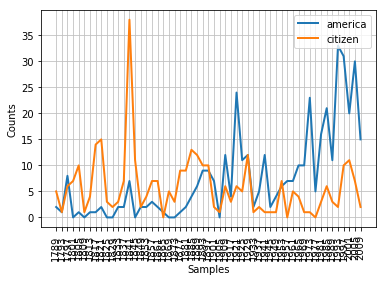

In [45]:
cfd.plot()

The plot in 1.2 was also based on a conditional frequency distribution, reproduced below. This time, the condition is the name of the language and the counts being plotted are derived from word lengths [1]. It exploits the fact that the filename for each language is the language name followed by '-Latin1' (the character encoding).



In [46]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word)) #[1]
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

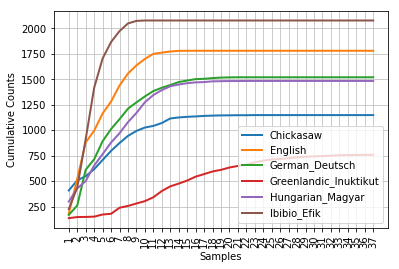

In [47]:
cfd.plot(cumulative=True)

In the plot() and tabulate() methods, we can optionally specify which conditions to display with a conditions= parameter. When we omit it, we get all the conditions. Similarly, we can limit the samples to display with a samples= parameter. This makes it possible to load a large quantity of data into a conditional frequency distribution, and then to explore it by plotting or tabulating selected conditions and samples. It also gives us full control over the order of conditions and samples in any displays. For example, we can tabulate the cumulative frequency data just for two languages, and for words less than 10 characters long, as shown below. We interpret the last cell on the top row to mean that 1,638 words of the English text have 9 or fewer letters( cumulative is set to True).



In [48]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


<b>Your Turn</b>: Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. ['Monday', ...]. Now tabulate the counts for these words using cfd.tabulate(samples=days). Now try the same thing using  plot in place of tabulate. You may control the output order of days with the help of an extra parameter: samples=['Monday', ...].


In [49]:
from nltk.corpus import brown
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cfd=nltk.ConditionalFreqDist(
                            (genre,day)
                            for genre in ['news','romance']
                            for day in brown.words(categories=genre)
                            if day in days)

In [50]:
cfd.tabulate(samples=days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


for news we got Monday and for romance we got Sunday ==> :) sunday for ramance it is logical

You may have noticed that the multi-line expressions we have been using with conditional frequency distributions look like list comprehensions, but without the brackets. In general, when we use a list comprehension as a parameter to a function, like set([w.lower() for w in t]), we are permitted to omit the square brackets and just write: set(w.lower() for w in t). (See the discussion of "generator expressions" in 4.2 for more about this.)



### 2.4   Generating Random Text with Bigrams



We can use a conditional frequency distribution to create a table of bigrams (word pairs). (We introducted bigrams in 3.) The bigrams() function takes a list of words and builds a list of consecutive word pairs. Remember that, in order to see the result and not a cryptic "generator object", we need to use the list() function:



In [51]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven','and', 'the', 'earth', '.']
print(list(nltk.bigrams(sent)))

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.')]


In 2.2, we treat each word as a condition, and for each one we effectively create a frequency distribution over the following words. The function generate_model() contains a simple loop to generate text. When we call the function, we choose a word (such as 'living') as our initial context, then once inside the loop, we print the current value of the variable word, and reset word to be the most likely token in that context (using max()); next time through the loop, we use that word as our new context. As you can see by inspecting the output, this simple approach to text generation tends to get stuck in loops; another method would be to randomly choose the next word from among the available words.



In [52]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams) #[1]

In [53]:
print(cfd['living'].max())  # the most repeated word after  the word :living
cfd['living']


creature


FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [54]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

Figure 2.2: Generating Random Text: this program obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution to record which words are most likely to follow a given word; e.g., after the word living, the most likely word is creature; the generate_model() function uses this data, and a seed word, to generate random text.

![](dist.JPG)

## 3   More Python: Reusing Code



### 3.2   Functions



Suppose that you work on analyzing text that involves different forms of the same word, and that part of your program needs to work out the plural form of a given singular noun. Suppose it needs to do this work in two places, once when it is processing some texts, and again when it is processing user input.

Rather than repeating the same code several times over, it is more efficient and reliable to localize this work inside a function. A function is just a named block of code that performs some well-defined task, as we saw in 1. A function is usually defined to take some inputs, using special variables known as parameters, and it may produce a result, also known as a return value. We define a function using the keyword def followed by the function name and any input parameters, followed by the body of the function. Here's the function we saw in 1 (including the import statement that is needed for Python 2, in order to make division behave as expected):

In [55]:
def lexical_diversity(text):
    return (len(set(text))/len(text) )  # recall: keeps unique words ( without duplicating them)

We use the keyword return to indicate the value that is produced as output by the function. In the above example, all the work of the function is done in the return statement. Here's an equivalent definition which does the same work using multiple lines of code. We'll change the parameter name from text to my_text_data to remind you that this is an arbitrary choice:



In [56]:
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

Notice that we've created some new variables inside the body of the function. These are local variables and are not accessible outside the function. So now we have defined a function with the name  lexical_diversity. But just defining it won't produce any output! Functions do nothing until they are "called" (or "invoked"):



In [57]:
from nltk.corpus import genesis
genesis.fileids()[0:2]

['english-kjv.txt', 'english-web.txt']

In [58]:
my_text_data=genesis.words('english-kjv.txt')
lexical_diversity(my_text_data)

0.06230453042623537

Let's return to our earlier scenario, and actually define a simple function to work out English plurals. The function plural() in 3.1 takes a singular noun and generates a plural form, though it is not always correct. (We'll discuss functions at greater length in 4.4.)



In [59]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'
    

In [60]:
plural('hobby'),plural('woman'),plural('church')

('hobbies', 'women', 'churches')

Example 3.1 (code_plural.py): Figure 3.1: A Python Function: this function tries to work out the plural form of any English noun; the keyword def (define) is followed by the function name, then a parameter inside parentheses, and a colon; the body of the function is the indented block of code; it tries to recognize patterns within the word and process the word accordingly; e.g., if the word ends with y, delete the y and add ies.


The <b>endswith()</b> function is always associated with a string object (e.g., word in 3.1). To call such functions, we give the name of the object, a period, and then the name of the function. These functions are usually known as methods.



### 3.3   Modules



Over time you will find that you create a variety of useful little text processing functions, and you end up copying them from old programs to new ones. Which file contains the latest version of the function you want to use? It makes life a lot easier if you can collect your work into a single place, and access previously defined functions without making copies.

To do this, save your function(s) in a file called (say) text_proc.py. Now, you can access your work simply by importing it from the file:

In [61]:
from text_proc import plural   # i have wrote a python code and name it as text_proc.py
plural('wish'), plural('fan')

('wishes', 'fen')

Our plural function obviously has an error, since the plural of fan is fans. Instead of typing in a new version of the function, we can simply edit the existing one. Thus, at every stage, there is only one version of our plural function, and no confusion about which one is being used.

A collection of variable and function definitions in a file is called a Python <b>module</b>. A collection of related modules is called a <b>package</b>. NLTK's code for processing the Brown Corpus is an example of a module, and its collection of code for processing all the different corpora is an example of a package. NLTK itself is a set of packages, sometimes called a <b>library</b>.

- Many variables and functions in a file ====>  <b>Module</b>
- Collections of modules ===> <b>Package</b>
- Set of package ====> <b>library</b>

### 4   Lexical Resources



A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. For example, if we have defined a text my_text, then vocab = sorted(set(my_text)) builds the vocabulary of my_text, while word_freq = FreqDist(my_text) counts the frequency of each word in the text. Both of vocab and word_freq are simple lexical resources. Similarly, a concordance like the one we saw in 1 gives us information about word usage that might help in the preparation of a dictionary. Standard terminology for lexicons is illustrated in 4.1. A lexical entry consists of a headword (also known as a lemma) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called homonyms.



![](lexical.JPG)

The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated lexicons include complex structure within and across the individual entries. In this section we'll look at some lexical resources included with NLTK.



### 4.1   Wordlist Corpora



NLTK includes some corpora that are nothing more than wordlists. The Words Corpus is the /usr/share/dict/words file from Unix, used by some spell checkers. We can use it to find unusual or mis-spelt words in a text corpus, as shown in 4.2.



In [62]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))


['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

In [63]:
print(unusual_words(nltk.corpus.nps_chat.words()))

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

Example 4.2 (code_unusual.py): Figure 4.2: Filtering a Text: this program computes the vocabulary of a text, then removes all items that occur in an existing wordlist, leaving just the uncommon or mis-spelt words.


There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.



In [64]:
from nltk.corpus import stopwords
print(stopwords.words('english')), print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

(None, None)

Let's define a function to compute what fraction of words in a text are not in the stopwords list:



In [65]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [66]:
content_fraction(nltk.corpus.reuters.words())


0.735240435097661

Thus, with the help of stopwords we filter out over a quarter of the words of the text. Notice that we've combined two different kinds of corpus here, using a lexical resource to filter the content of a text corpus.



![](puzzle.JPG)

A wordlist is useful for solving word puzzles, such as the one in 4.3. Our program iterates through every word and, for each one, checks whether it meets the conditions. It is easy to check obligatory letter [2] and length constraints [1] (and we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The FreqDist comparison method [3] permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.



In [67]:
puzzle_letters = nltk.FreqDist('egivrvonl') # frequency of each letter
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 #[1]
                      and obligatory in w #[2]
                      and nltk.FreqDist(w) <= puzzle_letters] #[3]  # letters in w must be in the puzzle word, otherwise the 
# comparaison will always give False


['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [68]:
nltk.FreqDist('liwe')<= puzzle_letters

False

In [69]:
puzzle_letters

FreqDist({'e': 1, 'g': 1, 'i': 1, 'l': 1, 'n': 1, 'o': 1, 'r': 1, 'v': 2})

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:



In [70]:
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

It is well known that names ending in the letter a are almost always female. We can see this and some other patterns in the graph in 4.4, produced by the following code. Remember that name[-1] is the last letter of name.



In [71]:
cfd= nltk.ConditionalFreqDist(
(fileid,name[-1])
for fileid in names.fileids()
for name in names.words(fileid)
)

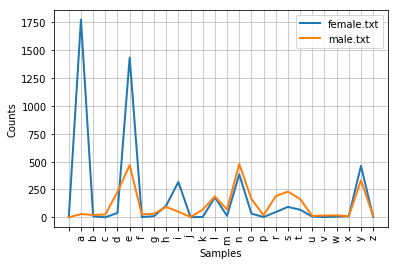

In [72]:
cfd.plot()

<i>Figure 4.4: Conditional Frequency Distribution: this plot shows the number of female and male names ending with each letter of the alphabet; most names ending with a, e or i are female; names ending in h and l are equally likely to be male or female; names ending in k, o, r, s, and t are likely to be male.</i>


### 4.2   A Pronouncing Dictionary



A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.



In [73]:
entries= nltk.corpus.cmudict.entries()
len(entries)

133737

In [74]:
for entry in entries[42000:42004]:
    print(entry)

('fightings', ['F', 'AY1', 'T', 'IH0', 'NG', 'Z'])
('fightmaster', ['F', 'AY1', 'T', 'M', 'AE2', 'S', 'T', 'ER0'])
('fights', ['F', 'AY1', 'T', 'S'])
("fight's", ['F', 'AY1', 'T', 'Z'])


In [75]:
for entry in entries[42371:42379]:
...     print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as phones. Observe that fire has two pronunciations (in US English): the one-syllable  F AY1 R, and the two-syllable F AY1 ER0. The symbols in the CMU Pronouncing Dictionary are from the Arpabet, described in more detail at http://en.wikipedia.org/wiki/Arpabet



Each entry consists of two parts, and we can process these individually using a more complex version of the for statement. Instead of writing for entry in entries:, we replace entry with two variable names, word, pron [1]. Now, each time through the loop, word is assigned the first part of the entry, and pron is assigned the second part of the entry:



In [76]:
for word, pron in entries:
    if len(pron)==3:
        ph1,ph2,ph3=pron
        if ph1=='P' and ph3=='T':
            print(word,ph2, end=' ')
    

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

Here's another example of the same for statement, this time used inside a list comprehension. This program finds all words whose pronunciation ends with a syllable sounding like nicks. You could use this method to find rhyming words.



In [77]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word,pron in entries if pron[-4:]==syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

Notice that the one pronunciation is spelt in several ways: nics, niks, nix, even ntic's with a silent t, for the word atlantic's. Let's look for some other mismatches between pronunciation and writing. Can you summarize the purpose of the following examples and explain how they work?



In [78]:
[ w for w ,pron in entries if w[-1]=='n' and pron[-1]=='M'] # list of words that end with mn but we do not spell the 'n'

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [79]:
sorted(set(w for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))


['gnagey',
 'gnaizda',
 'gnann',
 'gnarl',
 'gnarle',
 'gnarled',
 'gnarling',
 'gnarls',
 'gnarly',
 'gnash',
 'gnashing',
 'gnat',
 'gnatcatcher',
 'gnatcatchers',
 'gnats',
 'gnau',
 'gnaw',
 'gnawed',
 'gnawing',
 'gnaws',
 'gneiss',
 'gnocchi',
 'gnome',
 'gnomes',
 'gnomic',
 'gnomonic',
 'gnosticism',
 'gnu',
 'knaack',
 'knaak',
 'knab',
 'knabb',
 'knabe',
 'knable',
 'knack',
 'knacks',
 'knackstedt',
 'knaggs',
 'knape',
 'knapik',
 'knapke',
 'knapp',
 "knapp's",
 'knappenberger',
 'knapper',
 'knapsack',
 'knapton',
 'knarr',
 'knaub',
 'knauer',
 'knauf',
 'knauff',
 'knaup',
 'knaus',
 'knauss',
 'knave',
 'knaves',
 'knead',
 'kneading',
 'kneafsey',
 'kneale',
 'knebel',
 'knecht',
 'knechtel',
 'knee',
 'kneebone',
 'kneecap',
 'kneecaps',
 'kneece',
 'kneed',
 'kneeing',
 'kneel',
 'kneeland',
 'kneeling',
 'kneer',
 'knees',
 'kneip',
 'kneisel',
 'kneisley',
 'knell',
 'kneller',
 'knelt',
 'knepp',
 'knepper',
 'knerr',
 'kness',
 'knesset',
 'knew',
 'knezevich',

The phones contain digits to represent primary stress (1), secondary stress (2) and no stress (0). As our final example, we define a function to extract the stress digits and then scan our lexicon to find words having a particular stress pattern.



In [80]:
def stress(pron):
     return [char for phone in pron for char in phone if char.isdigit()]
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [81]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]


['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

A subtlety of the above program is that our user-defined function stress() is invoked inside the condition of a list comprehension. There is also a doubly-nested for loop. There's a lot going on here and you might want to return to this once you've had more experience using list comprehensions.


We can use a conditional frequency distribution to help us find minimally-contrasting sets of words. Here we find all the p-words consisting of three sounds [2], and group them according to their first and last sounds [1].



In [83]:
p3=[(pron[0]+''+pron[1],word)
   for word, pron in entries
   if pron[0]=='P' and len(pron)==3]

In [95]:
cfd = nltk.ConditionalFreqDist(p3)


In [96]:
for template in sorted(cfd.conditions()):
     if len(cfd[template]) > 10:
         words = sorted(cfd[template])
         wordstring = ' '.join(words)
         print(template, wordstring[:70] + "...")

PAA1 paap paape paar paasch pahl pai pall palm palme par parr pas paz poch ...
PAE1 pac pack pad paff pak pal pam pan pang pap papp paque pash pass pasts ...
PAH1 pub puck puff pug puhl pun pung pup pus pusch puss putt...
PAO1 pall paul paule paull paup pause pawed pawn paws poff pol pom pong por...
PAY1 pied pies pike pile pine pio pipe pyke pyle pyne pyre...
PEH1 pair pare pear pech peck peg pegg pehl pell pelle pen peng penh penn p...
PER1 pearl pearle pearse peart pera perc perce perch perk perl perle pero p...
PEY1 pace page paid paige paign paik pail paille pain paine pais pait paiz ...
PIH1 peer pic piche pick pier pig pigg pihl pik pil pill pille pimm pin pin...
PIY1 p's p.'s p.s paek paeth peace peach peak peake peal peale peas pease p...
POW1 poach poag poe's poehl poer pogue pohl poke pole polk poll pope pose p...
PR pray pre pree prew prey pri prix pro prough prow pru prue prugh pry...
PUW1 pooch poof poohed pool poole poon poop poul puche puett puig puth...


Rather than iterating over the whole dictionary, we can also access it by looking up particular words. We will use Python's dictionary data structure, which we will study systematically in 3. We look up a dictionary by giving its name followed by a key (such as the word 'fire') inside square brackets [1].



In [100]:
prondict = nltk.corpus.cmudict.dict()
#prondict['blog'] #[2]
prondict['blog'] = [['B', 'L', 'AA1', 'G']] #[3]
prondict['blog']


[['B', 'L', 'AA1', 'G']]

If we try to look up a non-existent key [2], we get a KeyError. This is similar to what happens when we index a list with an integer that is too large, producing an IndexError. The word blog is missing from the pronouncing dictionary, so we tweak our version by assigning a value for this key [3] (this has no effect on the NLTK corpus; next time we access it, blog will still be absent).

We can use any lexical resource to process a text, e.g., to filter out words having some lexical property (like nouns), or mapping every word of the text. For example, the following text-to-speech function looks up each word of the text in the pronunciation dictionary.



In [109]:
text = ['natural', 'language', 'processing']
print([ph for w in text for ph in prondict[w][0]] ) # pron for each word in text, we take one solution, if you tap prondict[w] only you got all possibilitie  to p
# to pronounce a word

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']


### 4.3   Comparative Wordlists



Another example of a tabular lexicon is the comparative wordlist. NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages. The languages are identified using an ISO 639 two-letter code.



In [110]:
from nltk.corpus import swadesh

In [112]:
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [114]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [115]:
# thou: is an old version for 'you' used when addressing to God sobhanah wa ta3ala.
#thick : épais= سميك  has large distance between sides or edges
# louse= pou= قملة : insects found on the bodies of peaple and animals 
#

In [117]:
print(swadesh.words('fr'))

['je', 'tu, vous', 'il', 'nous', 'vous', 'ils, elles', 'ceci', 'cela', 'ici', 'là', 'qui', 'quoi', 'où', 'quand', 'comment', 'ne...pas', 'tout', 'plusieurs', 'quelques', 'peu', 'autre', 'un', 'deux', 'trois', 'quatre', 'cinq', 'grand', 'long', 'large', 'épais', 'lourd', 'petit', 'court', 'étroit', 'mince', 'femme', 'homme', 'homme', 'enfant', 'femme, épouse', 'mari, époux', 'mère', 'père', 'animal', 'poisson', 'oiseau', 'chien', 'pou', 'serpent', 'ver', 'arbre', 'forêt', 'bâton', 'fruit', 'graine', 'feuille', 'racine', 'écorce', 'fleur', 'herbe', 'corde', 'peau', 'viande', 'sang', 'os', 'graisse', 'œuf', 'corne', 'queue', 'plume', 'cheveu', 'tête', 'oreille', 'œil', 'nez', 'bouche', 'dent', 'langue', 'ongle', 'pied', 'jambe', 'genou', 'main', 'aile', 'ventre', 'entrailles', 'cou', 'dos', 'sein, poitrine', 'cœur', 'foie', 'boire', 'manger', 'mordre', 'sucer', 'cracher', 'vomir', 'souffler', 'respirer', 'rire', 'voir', 'entendre', 'savoir', 'penser', 'sentir', 'craindre, avoir peur', 'do

We can access cognate words from multiple languages using the entries() method, specifying a list of languages. With one further step we can convert this into a simple dictionary (we'll learn about dict() in 3).



In [121]:
fr2en = swadesh.entries(['fr', 'en'])
print(fr2en)

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick'), ('lourd', 'heavy'), ('petit', 'small'), ('court', 'short'), ('étroit', 'narrow'), ('mince', 'thin'), ('femme', 'woman'), ('homme', 'man (adult male)'), ('homme', 'man (human being)'), ('enfant', 'child'), ('femme, épouse', 'wife'), ('mari, époux', 'husband'), ('mère', 'mother'), ('père', 'father'), ('animal', 'animal'), ('poisson', 'fish'), ('oiseau', 'bird'), ('chien', 'dog'), ('pou', 'louse'), ('serpent', 'snake'), ('v

In [123]:
translate = dict(fr2en)
translate['chien']

'dog'

In [124]:
translate['jeter']

'throw'

In [125]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English


In [127]:
translate.update(dict(de2en))
translate.update(dict(es2en))

translate['perro'],translate['Hund']

('dog', 'dog')

We can compare words in various Germanic and Romance languages:



In [128]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


### 4.4   Shoebox and Toolbox Lexicons



Perhaps the single most popular tool used by linguists for managing data is Toolbox, previously known as Shoebox since it replaces the field linguist's traditional shoebox full of file cards. Toolbox is freely downloadable from http://www.sil.org/computing/toolbox/.

A Toolbox file consists of a collection of entries, where each entry is made up of one or more fields. Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet.

Here is a dictionary for the Rotokas language. We see just the first entry, for the word kaa meaning "to gag":

In [130]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')


[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

Entries consist of a series of attribute-value pairs, like ('ps', 'V') to indicate that the part-of-speech is 'V' (verb), and ('ge', 'gag') to indicate that the gloss-into-English is 'gag'. The last three pairs contain an example sentence in Rotokas and its translations into Tok Pisin and English.

The loose structure of Toolbox files makes it hard for us to do much more with them at this stage. XML provides a powerful way to process this kind of corpus and we will return to this topic in 11..

## 5   WordNet

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.



### 5.1   Senses and Synonyms



Consider the sentence in (1a). If we replace the word motorcar in (1a) by automobile, to get (1b), the meaning of the sentence stays pretty much the same:

(1)		
a.		Benz is credited with the invention of the motorcar.

b.		Benz is credited with the invention of the automobile.



Since everything else in the sentence has remained unchanged, we can conclude that the words motorcar and automobile have the same meaning, i.e. they are synonyms. We can explore these words with the help of WordNet:



In [132]:
from nltk.corpus import wordnet as wn

In [134]:
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas"):



In [135]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:



In [137]:
wn.synset('car.n.01').definition()


'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [138]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This pairing of a synset with a word is called a lemma. We can get all the lemmas for a given synset [1], look up a particular lemma [2], get the synset corresponding to a lemma [3], and get the "name" of a lemma [4]:



In [139]:
wn.synset('car.n.01').lemmas()# [1]
wn.lemma('car.n.01.automobile') #[2]
wn.lemma('car.n.01.automobile').synset() #[3]
wn.lemma('car.n.01.automobile').name() #[4]

'automobile'

Unlike the word motorcar, which is unambiguous and has one synset, the word car is ambiguous, having five synsets:



In [140]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [141]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


For convenience, we can access all the lemmas involving the word car as follows.



In [142]:
>>> wn.lemmas('car')


[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

Note

<b>Your Turn:</b> Write down all the senses of the word <b> dish</b> that you can think of. Now, explore this word with the help of WordNet, using the same operations we used above.

In [145]:
wn.lemmas('dish') # getting all lemmas for the word dish: we have 8 lemmas

[Lemma('dish.n.01.dish'),
 Lemma('dish.n.02.dish'),
 Lemma('dish.n.03.dish'),
 Lemma('smasher.n.02.dish'),
 Lemma('dish.n.05.dish'),
 Lemma('cup_of_tea.n.01.dish'),
 Lemma('serve.v.06.dish'),
 Lemma('dish.v.02.dish')]

In [154]:
print(wn.synset('smasher.n.02').lemma_names())  # all synonymous for dish  in smasher.n.02 synset

['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']


In [151]:
print(wn.synset('cup_of_tea.n.01').lemma_names())

['cup_of_tea', 'bag', 'dish']


In [152]:
print(wn.synset('serve.v.06').lemma_names())

['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']


In [153]:
print(wn.synset('dish.n.05').lemma_names())

['dish', 'dish_aerial', 'dish_antenna', 'saucer']


In [155]:
wn.synset('smasher.n.02').definition()  # get the defintion for dish in smasher.n.02 synset

'a very attractive or seductive looking woman'

In [156]:
wn.synset('cup_of_tea.n.01').definition()

'an activity that you like or at which you are superior'

In [157]:
wn.synset('serve.v.06').definition()

'provide (usually but not necessarily food)'

In [160]:
wn.synset('serve.v.06').examples()

['We serve meals for the homeless',
 'She dished out the soup at 8 P.M.',
 'The entertainers served up a lively show']

### 5.2   The WordNet Hierarchy

